## Import Libraries 

In [345]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns
import warnings
from datasist.structdata import detect_outliers

In [346]:
warnings.filterwarnings('ignore')

In [347]:
%matplotlib inline 

In [348]:
sns.set_theme(context = 'paper' , style = 'whitegrid' , palette = 'Set1' , font_scale = 1,
             rc = {'figure.figsize' : (8 , 4)})

## Read 1st Dataset
* Clean and Prepare for analysis 
* see strange values and check outliers point 
* deal with maissing value based on percentage 

In [349]:
df = pd.read_csv('Fashion.csv')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


* check data info for # of records and feature and missing value 
* check if columns data type represent it's value 

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


* see missing value percentage 

In [351]:
df.isnull().mean()*100

id                    0.000000
gender                0.000000
masterCategory        0.000000
subCategory           0.000000
articleType           0.000000
baseColour            0.033749
season                0.047248
year                  0.002250
usage                 0.713225
productDisplayName    0.015749
dtype: float64

* missing records are so small no problem to drop it 

In [352]:
df.dropna(inplace = True , axis = 0 )

In [353]:
df.isnull().mean()*100

id                    0.0
gender                0.0
masterCategory        0.0
subCategory           0.0
articleType           0.0
baseColour            0.0
season                0.0
year                  0.0
usage                 0.0
productDisplayName    0.0
dtype: float64

### Check if there is duplicated records 

In [354]:
df.duplicated().sum()

0

### Do some univariate analysis to see different categories for each feature 
* see if there is wrong values 

In [355]:
df['gender'].unique()

array(['Men', 'Women', 'Boys', 'Girls', 'Unisex'], dtype=object)

<AxesSubplot:xlabel='gender', ylabel='count'>

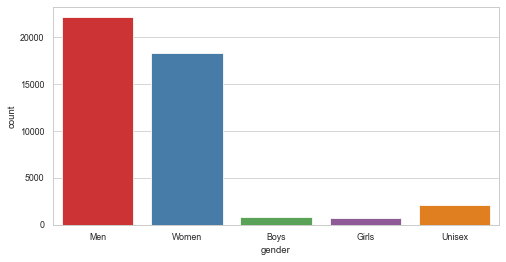

In [356]:
sns.countplot(df['gender'])

In [357]:
df['masterCategory'].unique()

array(['Apparel', 'Accessories', 'Footwear', 'Personal Care',
       'Free Items', 'Sporting Goods', 'Home'], dtype=object)

<AxesSubplot:xlabel='masterCategory', ylabel='count'>

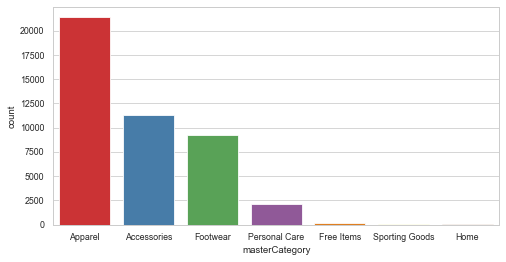

In [358]:
sns.countplot(df['masterCategory'])

In [359]:
df['subCategory'].unique()

array(['Topwear', 'Bottomwear', 'Watches', 'Socks', 'Shoes', 'Belts',
       'Flip Flops', 'Bags', 'Innerwear', 'Sandal', 'Shoe Accessories',
       'Fragrance', 'Jewellery', 'Lips', 'Saree', 'Eyewear', 'Scarves',
       'Dress', 'Loungewear and Nightwear', 'Wallets', 'Apparel Set',
       'Headwear', 'Mufflers', 'Skin Care', 'Makeup', 'Free Gifts',
       'Ties', 'Accessories', 'Nails', 'Beauty Accessories',
       'Water Bottle', 'Skin', 'Eyes', 'Bath and Body', 'Gloves',
       'Sports Accessories', 'Cufflinks', 'Sports Equipment', 'Stoles',
       'Hair', 'Perfumes', 'Home Furnishing', 'Umbrellas', 'Wristbands',
       'Vouchers'], dtype=object)

In [360]:
df['articleType'].unique()

array(['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks',
       'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra',
       'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant',
       'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas',
       'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees',
       'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests',
       'Pendant', 'Laptop Bag', 'Scarves', 'Dresses', 'Night suits',
       'Skirts', 'Wallets', 'Blazers', 'Ring', 'Kurta Sets', 'Clutches',
       'Shrug', 'Backpacks', 'Caps', 'Trousers', 'Earrings', 'Camisoles',
       'Boxers', 'Jewellery Set', 'Dupatta', 'Capris', 'Lip Gloss',
       'Bath Robe', 'Mufflers', 'Tunics', 'Jackets', 'Trunk',
       'Lounge Pants', 'Face Wash and Cleanser', 'Necklace and Chains',
       'Duffel Bag', 'Sports Sandals', 'Foundation and Primer',
       'Sweaters', 'Free Gifts', 'Trolley Bag', 'Tracksuits', 'Swimwear',
       'Shoe Laces', 'Fragr

In [361]:
df['baseColour'].unique()

array(['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey', 'Green', 'Purple',
       'White', 'Beige', 'Brown', 'Bronze', 'Teal', 'Copper', 'Pink',
       'Off White', 'Maroon', 'Red', 'Khaki', 'Orange', 'Yellow',
       'Charcoal', 'Gold', 'Steel', 'Tan', 'Multi', 'Magenta', 'Lavender',
       'Sea Green', 'Cream', 'Peach', 'Olive', 'Skin', 'Burgundy',
       'Coffee Brown', 'Grey Melange', 'Rust', 'Rose', 'Lime Green',
       'Mauve', 'Turquoise Blue', 'Metallic', 'Mustard', 'Taupe', 'Nude',
       'Mushroom Brown', 'Fluorescent Green'], dtype=object)

In [362]:
df['season'].unique()

array(['Fall', 'Summer', 'Winter', 'Spring'], dtype=object)

In [363]:
df['year'].unique()

array([2011., 2012., 2016., 2017., 2015., 2014., 2010., 2013., 2018.,
       2019., 2007., 2009., 2008.])

<AxesSubplot:xlabel='year', ylabel='count'>

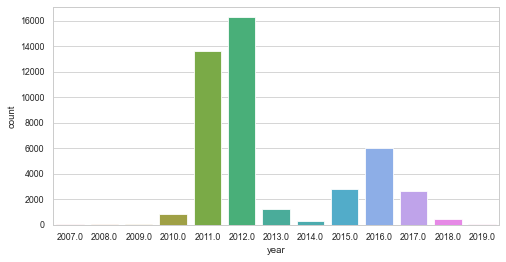

In [364]:
sns.countplot(df['year'])

In [365]:
df['usage'].unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', 'Smart Casual', 'Travel',
       'Party', 'Home'], dtype=object)

<AxesSubplot:xlabel='usage', ylabel='count'>

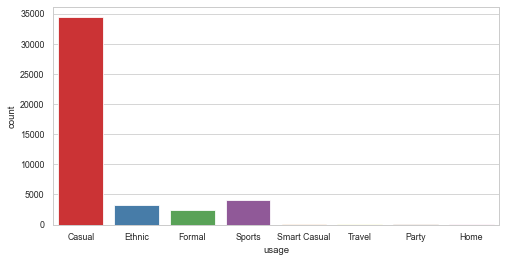

In [366]:
sns.countplot(df['usage'])

In [367]:
df['productDisplayName'].unique().tolist()

['Turtle Check Men Navy Blue Shirt',
 'Peter England Men Party Blue Jeans',
 'Titan Women Silver Watch',
 'Manchester United Men Solid Black Track Pants',
 'Puma Men Grey T-shirt',
 'Inkfruit Mens Chain Reaction T-shirt',
 'Fabindia Men Striped Green Shirt',
 'Jealous 21 Women Purple Shirt',
 'Puma Men Pack of 3 Socks',
 'Skagen Men Black Watch',
 'Puma Men Future Cat Remix SF Black Casual Shoes',
 'Fossil Women Black Huarache Weave Belt',
 'Fila Men Cush Flex Black Slippers',
 'Murcia Women Blue Handbag',
 'Ben 10 Boys Navy Blue Slippers',
 'Reid & Taylor Men Check Purple Shirts',
 'Police Men Black Dial Watch PL12889JVSB',
 'Gini and Jony Girls Knit White Top',
 'Bwitch Beige Full-Coverage Bra BW335',
 'Baggit Women Brown Handbag',
 'CASIO G-Shock Men Black Digital Watch G-7710-1DR G223',
 'ADIDAS Men Spry M Black Sandals',
 'Timberland Unisex Rubber Sole Brush Shoe Accessories',
 'ADIDAS Men Lfc Auth Hood Grey Sweatshirts',
 'David Beckham Signature Men Deos',
 'Buckaroo Men Flores 

## Now Save 1st data set for analysis 

In [368]:
df.to_csv('CleanedFashion1.csv' , index = False)

# ---------------------------------------------------------------------------------------

## Read 2nd Dataset 

In [292]:
df = pd.read_csv('myntra_products_catalog.csv')
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


##### drop unneeded columns 

In [293]:
df.drop(['ProductName' , 'Description'] , axis = 1 , inplace = True)

In [294]:
# check missing records 
df.isnull().mean()*100

ProductID       0.000000
ProductBrand    0.000000
Gender          0.000000
Price (INR)     0.000000
NumImages       0.000000
PrimaryColor    7.157153
dtype: float64

In [295]:
from sklearn.impute import SimpleImputer

In [296]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [297]:
imputer.fit_transform(df[['PrimaryColor']])

array([[' Black'],
       [' Beige'],
       [' Pink'],
       ...,
       ['Blue'],
       ['Blue'],
       [' Black']], dtype=object)

* Deal with categorical missing data with mode values to fill missing 

In [298]:
df['PrimaryColor'] = imputer.fit_transform(df[['PrimaryColor']])

In [299]:
# no duplicated records 
df.duplicated().sum()

0

In [301]:
df['ProductBrand'].unique()

array(['DKNY', 'EthnoVogue', 'SPYKAR', 'Raymond', 'Parx', 'SHOWOFF',
       'Kenneth Cole', 'Police', 'Vishudh', 'Being Human', 'Homesake',
       'SEJ by Nisha Gupta', 'YAK YAK', 'PARFAIT', 'Michael Kors',
       'HIGHLANDER', 'JEWEL JUNCTION', 'ID', 'Story@home',
       'Gini and Jony', 'Sera', 'AccessHer', 'Alcis',
       'Difference of Opinion', 'Tokyo Talkies', 'ANNA SUI',
       'her by invictus', 'Soie', 'Lara Karen', 'Urban Dog', 'ahilya',
       'VASTRAMAY', 'Campus Sutra', 'FIDO DIDO', 'MIAH Decor', 'BuckleUp',
       'Peter England', 'AIGNER', 'Lady Lyka', 'Park Avenue', 'Roadster',
       'U.S. Polo Assn. Denim Co.', 'Sweet Dreams', 'Kazo', 'Stylo Bug',
       'Bvlgari', 'Qraa Men', 'GAS', 'WITH', 'ZUSH', 'JBN Creation',
       'U.S. Polo Assn. Kids', 'DressBerry', 'ColorPlus', 'Lakme',
       'Allen Solly Woman', 'Palm Tree', 'Arrow', 'DAVID BECKHAM',
       'MANGO', 'Carrera', 'ROMEE', 'TAYHAA', 'Ishin', 'Shoe Couture',
       'HARBORNBAY', 'Keds', 'Rozia', 'Aj DEZInES', 

In [304]:
df['Gender'].unique()

array(['Unisex', 'Women', 'Men', 'Boys', 'Girls', 'Unisex Kids'],
      dtype=object)

<AxesSubplot:xlabel='Price (INR)', ylabel='Density'>

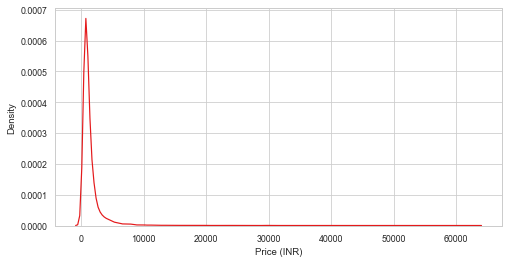

In [306]:
sns.kdeplot(df['Price (INR)'])

In [309]:
df.drop(df[df['Price (INR)'] > 10000].index , axis = 0 , inplace = True)

<AxesSubplot:xlabel='Price (INR)', ylabel='Density'>

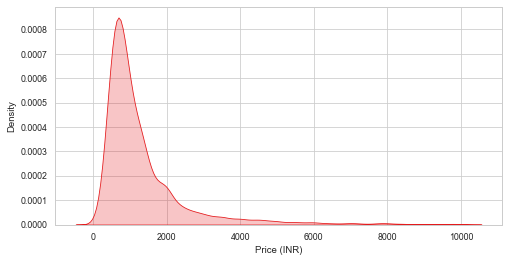

In [311]:
sns.kdeplot(df['Price (INR)'] , shade = True)

In [313]:
df['NumImages'].unique()

array([ 7,  5,  4,  6,  3,  2,  1,  8,  9, 10], dtype=int64)

In [316]:
df['PrimaryColor'].unique()

array([' Beige', ' Pink', 'Blue', ' White', ' Brown', ' Burgundy', ' Red',
       ' Green', ' Maroon', ' Navy', ' Black', ' Gold', ' Yellow',
       ' Grey', ' Platinum', ' Silver', ' Khaki', ' Mustard', ' Lavender',
       ' Matte', ' Rose', ' Charcoal', ' Orange', ' Purple', ' Peach',
       ' Magenta', ' Bronze'], dtype=object)

In [317]:
df.reset_index(inplace = True , drop = True)

## Now save 2nd dataset for analysis 

In [318]:
df.to_csv('CleanedFashion2.csv' , index = False)

## Read 3rd Data set 

In [390]:
df = pd.read_csv('Ajio Fasion Clothing.csv' , encoding='latin-1')

In [391]:
df.head()

,Product_URL,Brand,Description,Id_Product,URL_image,Category_by_gender,Discount Price (in Rs.),Original Price (in Rs.),Color
0,https://www.ajio.com/netplay-checked-polo-t-sh...,netplay,Checked Polo T-shirt,441137362002,https://assets.ajio.com/medias/sys_master/root...,Men,559,699,white
1,https://www.ajio.com/netplay-tapered-fit-flat-...,netplay,Tapered Fit Flat-Front Trousers,441124497006,https://assets.ajio.com/medias/sys_master/root...,Men,720,"1,499",navy
2,https://www.ajio.com/the-indian-garage-co-stri...,the-indian-garage-co,Striped Slim Fit Shirt with Patch Pocket,460453612003,https://assets.ajio.com/medias/sys_master/root...,Men,495,"1,649",white
3,https://www.ajio.com/performax-heathered-crew-...,performax,Heathered Crew-Neck T-shirt,441036730003,https://assets.ajio.com/medias/sys_master/root...,Men,329,599,charcoal
4,https://www.ajio.com/john-players-jeans-washed...,john-players-jeans,Washed Skinny Fit Jeans with Whiskers,441128531011,https://assets.ajio.com/medias/sys_master/root...,Men,899,999,jetblack


### drop unneesded columns 

In [392]:
df.drop(['Product_URL' , 'URL_image'] , axis = 1 , inplace = True)

* make some sort and rename columns 

In [393]:
df = df[['Id_Product' , 'Description' , 'Brand' , 'Category_by_gender' , 'Original Price (in Rs.)' 
         , 'Discount Price (in Rs.)' , 'Color']]

In [394]:
df.rename(columns = {'Category_by_gender' : 'Gender' , 'Original Price (in Rs.)' : 'Price' , 
                    'Discount Price (in Rs.)' : 'DiscountPrice'} , inplace = True)

In [395]:
# check missing 
df.isnull().sum()

Id_Product       0
Description      0
Brand            0
Gender           0
Price            0
DiscountPrice    0
Color            0
dtype: int64

In [396]:
# show if data types represent columns values ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367172 entries, 0 to 367171
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Id_Product     367172 non-null  int64 
 1   Description    367172 non-null  object
 2   Brand          367172 non-null  object
 3   Gender         367172 non-null  object
 4   Price          367172 non-null  object
 5   DiscountPrice  367172 non-null  object
 6   Color          367172 non-null  object
dtypes: int64(1), object(6)
memory usage: 19.6+ MB


#### we need some transformation on price and discount price 

In [397]:
df['Price'] = df['Price'].str.replace(',' , '.')

In [398]:
def fix_price(x):
    if len(x.split('.')) == 2:
        return float(x)*1000
    else:
        return float(x)
fix_price('1')

1.0

In [399]:
df['Price'] = df['Price'].apply(fix_price)

In [400]:
df['DiscountPrice'] = df['DiscountPrice'].str.replace(',' , '.')

In [401]:
df['DiscountPrice'] = df['DiscountPrice'].apply(fix_price)

In [402]:
df['DiscountPercentage'] = (df['Price'] - df['DiscountPrice']) * 100 / df['Price']

#### some outlier with unlogical data 

<AxesSubplot:xlabel='DiscountPrice', ylabel='Density'>

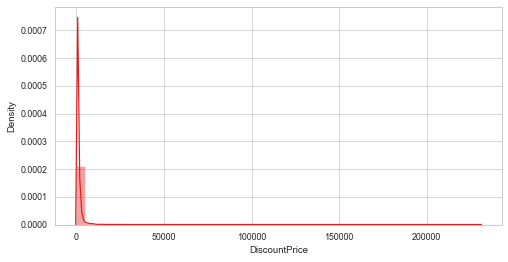

In [403]:
sns.distplot(df['DiscountPrice'])

In [404]:
# drop this records that make outlier may make mistakes in analysis 
df.drop(df[df['Price'] > 15000].index  , axis = 0  , inplace = True)

<AxesSubplot:xlabel='Price', ylabel='Density'>

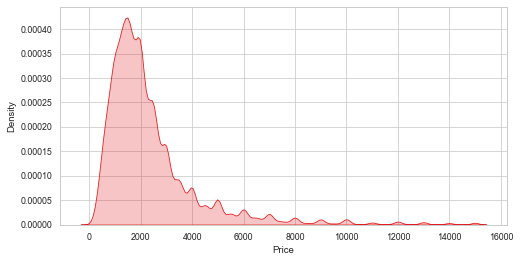

In [405]:
sns.kdeplot(df['Price'] , shade = True)

In [406]:
df['Brand'].unique()

array(['netplay', 'the-indian-garage-co', 'performax', ..., 'deepam',
       'tara-and-i', 'fab-viva'], dtype=object)

In [407]:
df['Gender'].unique()

array(['Men', 'Women'], dtype=object)

In [408]:
df['Color'].unique()

array(['white', 'navy', 'charcoal', ..., '5br', 'yn5', 'bc06alloyhtr'],
      dtype=object)

## Now save 3rd Dataset for analysis

In [409]:
df.to_csv('CleanedFashion3.csv' , index = False)